# Physical Layer Security on Multi-Mode Fibers - BPSK Example

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig

This notebook is part of the paper "Programmable Optical Data Transmission Through Multimode Fibres Enabling Confidentiality by Physical Layer Security" (S. Rothe, K.-L. Besser, D. Krause, R. Kuschmierz, N. Koukourakis, E. Jorswieck, J. Czarske. 2022, [arXiv:2203.02064](https://arxiv.org/abs/2203.02064)).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. This will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

In [ ]:
%matplotlib widget

from svd_precoding import main as svd_main
from data_transmission import main as data_main


MEASUREMENT_FILE="measurements/mmf-measurement.mat"
DATA_MEASUREMENT="measurements/data-measurement.mat"
SNR_DB = 10

## BPSK Transmission

The details on the transmission scheme can be found in the paper.
Alice transmits BPSK symbols to Bob and uses SVD for precoding.
She uses $K$ out of $N$ modes for transmitting data.

All of the results in this notebook are only shown for one MMF measurement, while the results shown in the paper are averaged over multiple measurements.
To reproduce the results in the paper, please run the provided `statistic.sh` Bash script.

### Perfect SVD Precoding

First, we show the results for perfect SVD precoding.
Based on the measured channels, we calculate the secrecy rate for the (theoretical) scenario that Alice can do a perfect SVD precoding.
This therefore provides an upper bound on the achievable performance in a real system.

The first plot shows the matrix with the singular values on the main diagonal.
Since Alice does a perfect SVD, this matrix is a perfect diagonal matrix with decreasing singular values.

<IPython.core.display.Javascript object>


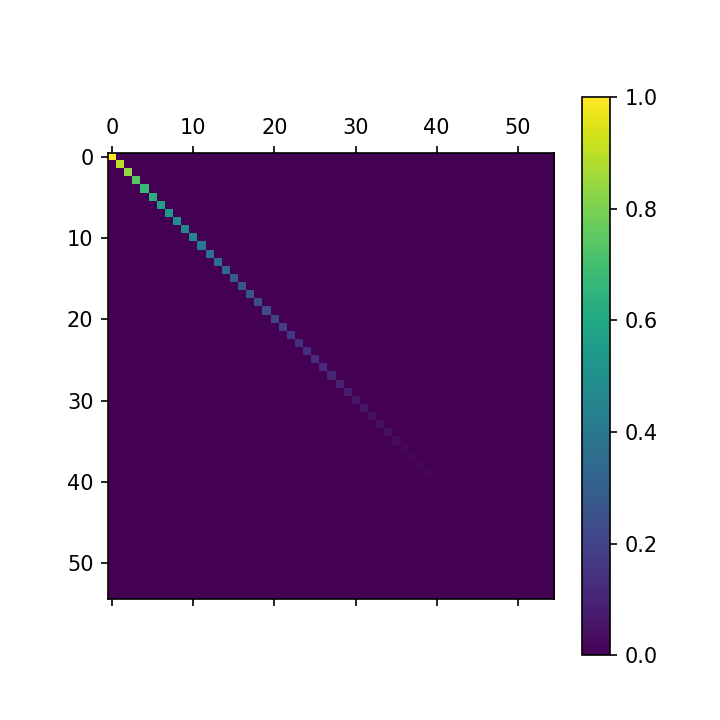

2022-02-18 11:18:23,030 - [    INFO]: SNR: 10.000000 dB
2022-02-18 11:18:23,030 - [    INFO]: SNR: 10.000000 dB
2022-02-18 11:18:23,032 - [    INFO]: Number of modes: 1
2022-02-18 11:18:23,032 - [    INFO]: Number of modes: 1
2022-02-18 11:18:24,054 - [    INFO]: Secrecy Capacity (MC): 0.999490
2022-02-18 11:18:24,054 - [    INFO]: Secrecy Capacity (MC): 0.999490
2022-02-18 11:18:24,070 - [    INFO]: Number of modes: 2
2022-02-18 11:18:24,070 - [    INFO]: Number of modes: 2
2022-02-18 11:18:25,114 - [    INFO]: Secrecy Capacity (MC): 1.999590
2022-02-18 11:18:25,114 - [    INFO]: Secrecy Capacity (MC): 1.999590
2022-02-18 11:18:25,121 - [    INFO]: Number of modes: 3
2022-02-18 11:18:25,121 - [    INFO]: Number of modes: 3
2022-02-18 11:18:26,175 - [    INFO]: Secrecy Capacity (MC): 2.957662
2022-02-18 11:18:26,175 - [    INFO]: Secrecy Capacity (MC): 2.957662
2022-02-18 11:18:26,181 - [    INFO]: Number of modes: 4
2022-02-18 11:18:26,181 - [    INFO]: Number of modes: 4
2022-02-18 1

<IPython.core.display.Javascript object>


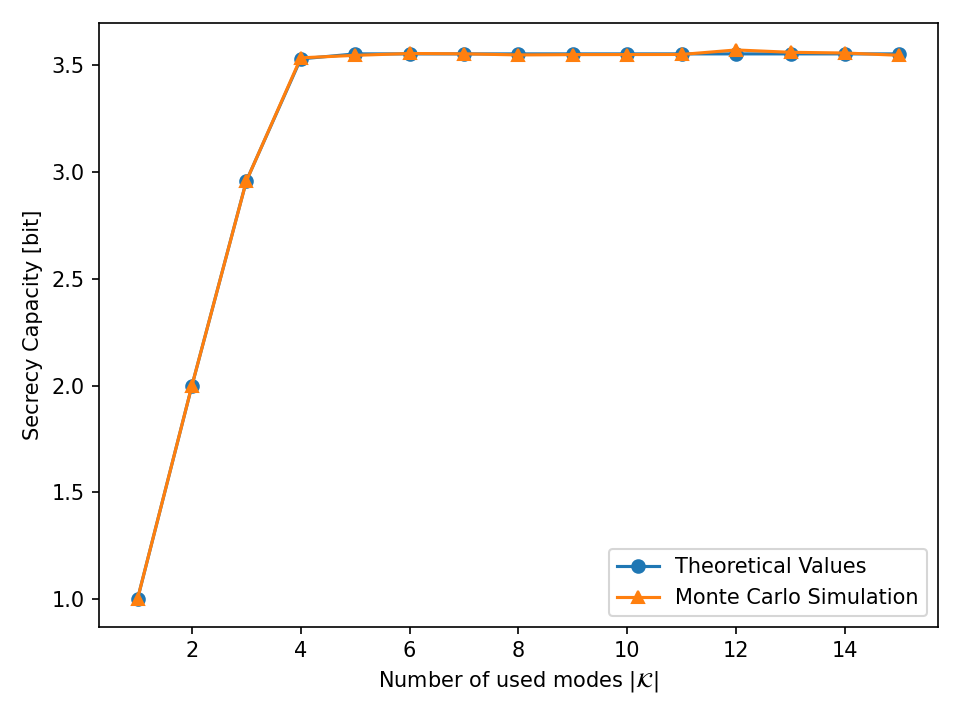

In [3]:
svd_main(SNR_DB, k=15, matrix=MEASUREMENT_FILE, precoded=False, num_samples=100000)

### Real SVD Precoding

Next, we use the results of the actual optical SVD precoding, i.e., the matrices in the following are based on real measurements of actual MMF fiber channels.

Therefore, the SVD precoding at the transmitter is not perfect and the matrix with the singular values is not a perfect diagonal matrix.
However, it can be seen that the diagonalization is close to optimal for the first sub-channels.

<IPython.core.display.Javascript object>


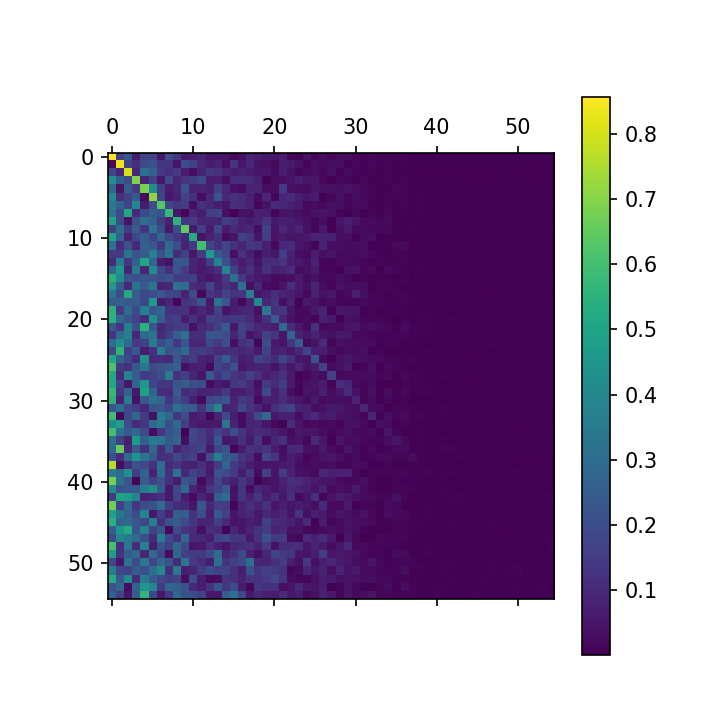

2022-02-18 11:19:28,355 - [    INFO]: SNR: 10.000000 dB
2022-02-18 11:19:28,355 - [    INFO]: SNR: 10.000000 dB
2022-02-18 11:19:28,357 - [    INFO]: Number of modes: 1
2022-02-18 11:19:28,357 - [    INFO]: Number of modes: 1
2022-02-18 11:19:29,366 - [    INFO]: Secrecy Capacity (MC): 0.997967
2022-02-18 11:19:29,366 - [    INFO]: Secrecy Capacity (MC): 0.997967
2022-02-18 11:19:29,403 - [    INFO]: Number of modes: 2
2022-02-18 11:19:29,403 - [    INFO]: Number of modes: 2
2022-02-18 11:19:30,484 - [    INFO]: Secrecy Capacity (MC): 1.903544
2022-02-18 11:19:30,484 - [    INFO]: Secrecy Capacity (MC): 1.903544
2022-02-18 11:19:30,500 - [    INFO]: Number of modes: 3
2022-02-18 11:19:30,500 - [    INFO]: Number of modes: 3
2022-02-18 11:19:31,587 - [    INFO]: Secrecy Capacity (MC): 2.537899
2022-02-18 11:19:31,587 - [    INFO]: Secrecy Capacity (MC): 2.537899
2022-02-18 11:19:31,594 - [    INFO]: Number of modes: 4
2022-02-18 11:19:31,594 - [    INFO]: Number of modes: 4
2022-02-18 1

<IPython.core.display.Javascript object>


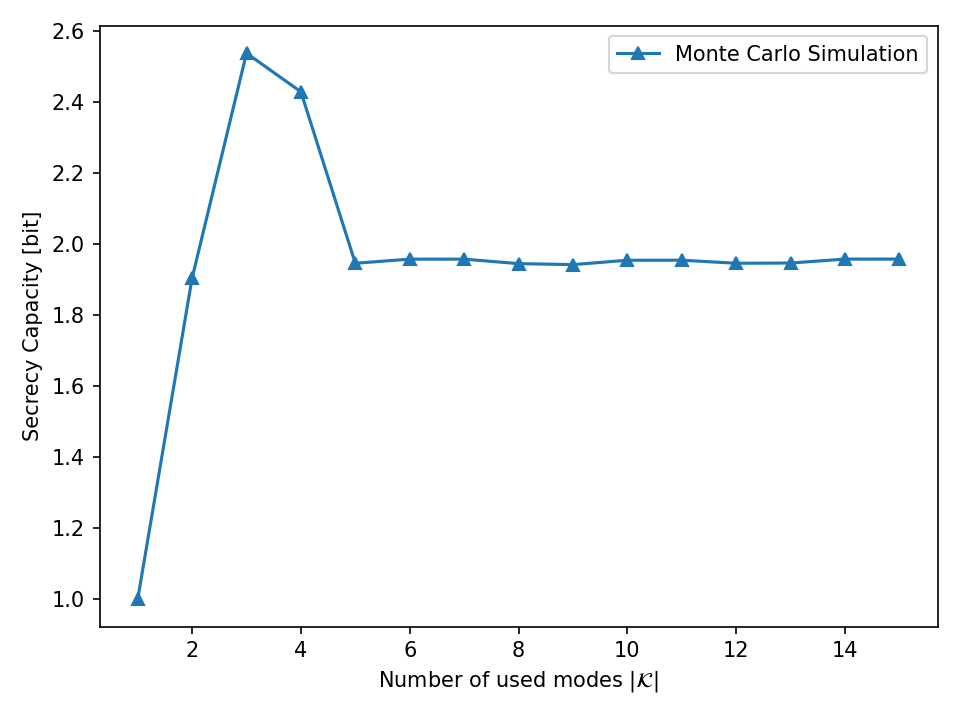

In [4]:
svd_main(SNR_DB, k=15, matrix=MEASUREMENT_FILE, precoded=True, num_samples=100000)

### Data Transmission

Finally, we illustrate the received signals at Bob and Eve by transmitting an (uncoded) image.

The top plot shows the transmitted image.
The bottom plots show the received images at Bob and Eve, respectively.

<IPython.core.display.Javascript object>


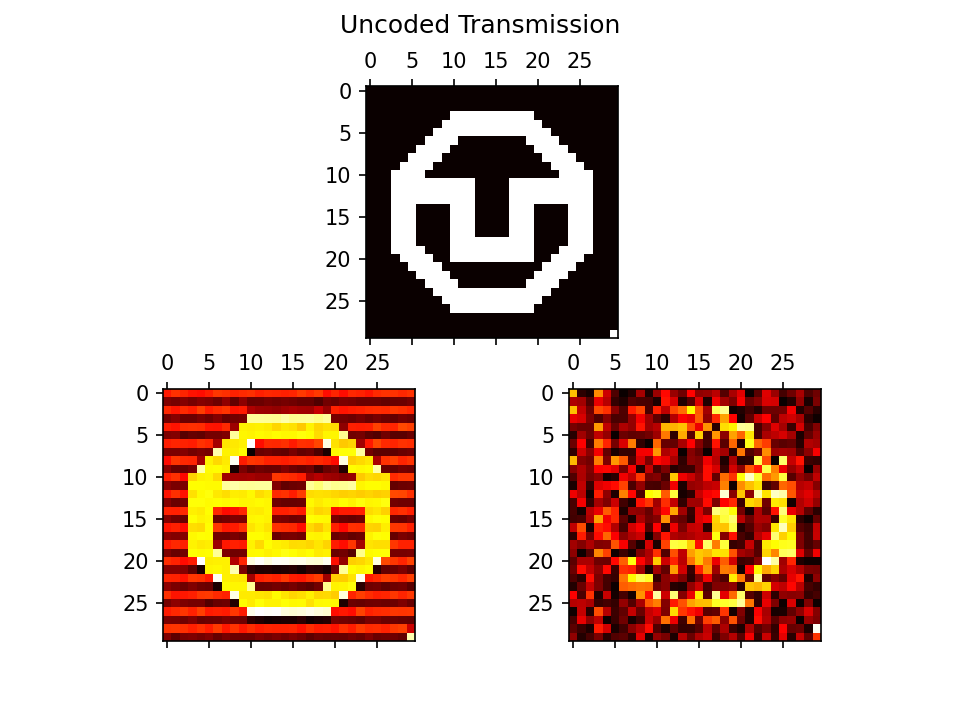

<IPython.core.display.Javascript object>


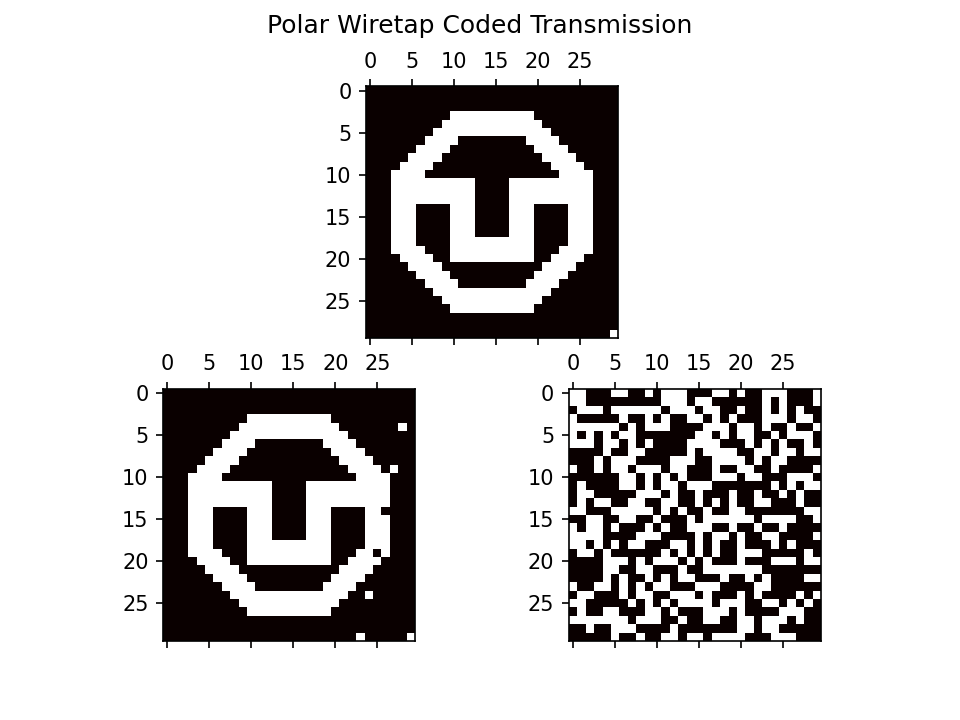

In [5]:
data_main(MEASUREMENT_FILE, DATA_MEASUREMENT)